<style>
  h1 {text-align:center;}
  h2 {text-align:center;}
  h3 {text-align:center;}
</style>

<center><img src="https://i.ytimg.com/vi/kHfd0Jt0AvA/maxresdefault.jpg" width= "900" height= "500"></center>

# The Probabilities and Financial Impact of Gacha Games

<h1 style= 'font-family:Lucida Handwriting'>Genshin Impact</h1>
<h3 style= 'font-weight: normal'>Kevin Wang and Nick Zhang</h3>


## Introduction 
Genshin Impact is a free-to-play action role-playing game developed and published by miHoYo. The game features a fantasy open world environment and action based battle system using elemental magic, character switching and uses gacha game monetization for players to obtain new characters, weapons, and other resources. The game is online-only and features limited co-op mode, allowing up to four players to play together. It was released on September 28, 2020. About 21.3 million people registered for the game, wit 17 million downlods at the games launch. Read more about Genshin Impact, and download the game for youself today: [Genshin Impact](https://genshin.mihoyo.com/en/home)

## The Potential Plight of Gacha Games</h2>
Gacha games contain the gacha mechanic, similar to the capsule toy vending machine idea. Players spend in-game currency to  recieve a random virtual item. Genshin Impact gacha rolls contain the following prizes: 3 Star Weapons, 4 Star Weapons, 4 Star Characters, 5 Star Weapons, and 5 Star Characters. Of course, higher the star ranking, higher the rarity of the item, and higher the appeal. Countless players have spent thousands of dollars of games such as Genshin Impact, even though it is free-to-play.

## Our Objectives
We will anaylze the probabilities of attaining the highest ranking items possible, as well as determining the average cost of rolling one 5 star item. Furthermore, we will test to see if there there is a strong positive relationship between money and the number of 5 star achieved, i.e the more money one spends would it lead to more 5 stars? We will then determine the financial costs of these gacha rolls and the investment into Genshin Impact for different player groups. Finally, we will calculate the financial impact of attaining one 5 Star on the typical, young adult, single-person household.

## Collecting Wishes Data
Gacha rolls in Genshin Impact are called wishes. We manually simulated and recorded 500 10-item rolls using the following simulator: [Wish Simulator](https://gi-wish-simulator.uzairashraf.dev/). Go ahead, try your luck!
Since our data is straightforward and manually collected to our specifications, there was no need to tidy or modify our data. We immediately processed the data from a csv into a Pandas dataframe.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')
data = data.dropna(axis= 1)
data

,3StarWeap,4StarWeap,5StarWeap,4StarChar,5StarChar
0,8,0,0,2,0
1,9,0,0,1,0
2,9,0,0,1,0
3,9,0,0,1,0
4,9,0,0,1,0
...,...,...,...,...,...
495,8,2,0,0,0
496,9,1,0,0,0
497,9,0,0,1,0
498,9,1,0,0,0


With the dataframe above, let us calcuate the sum of each star rating item we rolled.

In [3]:
sumData = pd.DataFrame(data= data.sum()).rename(columns={0: 'Sum'})
sumData

,Sum
3StarWeap,4260
4StarWeap,359
5StarWeap,34
4StarChar,304
5StarChar,43


Let us visualize the odds better with a simple barplot.

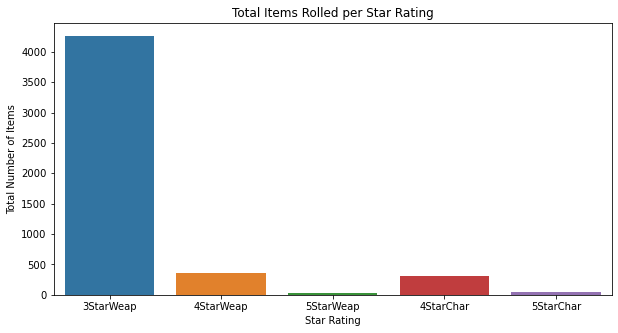

In [4]:
plt.figure(figsize=(10,5))
sb.barplot(x= sumData.index, y= 'Sum', data= sumData)
plt.title('Total Items Rolled per Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Total Number of Items')
plt.show()

In [5]:
print('Probability of achieving a 5 Star Weapon' , data['5StarWeap'].sum()/(5000))

Probability of achieving a 5 Star Weapon 0.0068


In [6]:
print('Probability of achieving a 5 Star Character:' , data['5StarChar'].sum()/(5000))

Probability of achieving a 5 Star Character: 0.0086


In [37]:
count = 0
sumDistances= 0
data['response'] = pd.Series(0, index=data.index)

item = 1
for w, c, index in zip(data['5StarWeap'].to_numpy(), data['5StarChar'].to_numpy(), data.index):
    if (w == 1) or (c == 1):
        data.loc[index, 'response'] = item
        sumDistances += count
        item += 1
        count = 0
    else:
        count+= 1
print('The average number of rolls between 5 Star Summons (Weapons or Characters):' , 10*(sumDistances//(data['5StarChar'].sum()+ data['5StarWeap'].sum())))

pd.set_option("display.max_rows", None, "display.max_columns", None)

The average number of rolls between 5 Star Summons (Weapons or Characters): 50


## Fitting a Linear Model
We could use the above conclusion to say that a player would need to roll 50 times to get a 5 star summon (weapon or character), however, we can double check by trying to fit a linear model.

In [1]:
linear_model = data[data['response'] != 0]
linear_model['index'] = linear_model.index

import statsmodels.formula.api as sm
ols = sm.ols('response~index', data = linear_model).fit()
print(ols.summary())

NameError: name 'data' is not defined

We can see that our predictor, index, has a P-value of zero, meaning that it is a significant predictor in explaining variability of our response variable (number of 5 star weapons / characters obtained). We can also see for simple linear regression, we havea n R-squared of 0.997, meaning that the model we have just created can explain 99.7% of all variability in the model. Thus, we have determined that the number of rolls you will instigate is correlated with the amount of 5 stars obtained. Due to the high R-squared value, it is unlikely that there are additional predictors that can we have not accounted for.

The slope by itself indicates that for every 1 grouping of rolls (or for every 10 rolls) the number of 5 star weapons / characters increases by 0.1349 items. Since this does not make much sense, we can instead repharse it as such:

For every 8 rolls of 10 (80 individual rolls) rolls, the number of 5 star weapons / characters increases by approximately 1 item. 

Note: In this case, an intercept of 3.2414 does not make any sense, since that would be implying that despite doing no rolls, we would still end up with around 3 5 star items / characters. Moving forward, we will ignore the intercept due to this logical fallacy.

